# Regression Diagnostics

The purpose of this assigment is introduce you to a new library for linear regression called statmodels which is much better suited for inferential modeling than sklearn. This assignment is also to familiarize yourself with some of most important procedures for improving the interpretability of regression coefficients. You will also perform important statistical tests that will help establish that whether or not important assumptions that safeguard the interpretability of OLS coefficients have been met. 

We will continue to use the Ames Housing Dataset so that you can focus on the techniques and not on cleaning/getting associated with a brand new dataset.

In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy import stats

## 1.1 Choose an X and Y variable from your dataset and use them to create a Seaborn Regplot

In [0]:
# Read in dataset 
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')


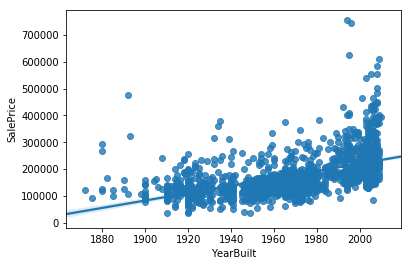

In [138]:
y = df['SalePrice']
X = df['YearBuilt']
sns.regplot(X, y)

## 1.2 Now using the X variables that you feel like will be the best predictors of y use statsmodel to run the multiple regression between these variables and Y. You don't need to use every X variable in your dataset, in fact it's probably better if you don't. Just pick ones that you have already cleaned that seem the most relevant to house prices.

In [0]:
X = df[['YearBuilt','OverallQual','Fireplaces','GarageArea','LotArea','GrLivArea','PoolArea','FullBath','HalfBath','YearRemodAdd']]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

In [0]:
df.info()

## 1.3 Identify the standard errors and P-Values of these coefficients in the output table. What is the interpretation of the P-values here?

In [0]:
# All but 1 P-values indicate that we reject the null hypothesis that the coef is 0
# Pool Area in this model has a P-value of 0.368 which means that this feature does not help in accurately infering the Sale Price of a home

## 1.4 Remove outliers from your dataset and run the regression again. Do you see a change in some coefficients? Which seem to move the most?

In [141]:
X['Price'] = y
print(X.shape)
X = X[(np.abs(stats.zscore(X)) < 3).all(axis=1)]
print(X.shape)
# This got rid if all the PoolArea entries that weren't 0 since most of the houses don't have pools

(1460, 11)
(1387, 11)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [142]:
y = X['Price']
X = X[['YearBuilt','OverallQual','Fireplaces','GarageArea','LotArea','GrLivArea','PoolArea','FullBath','HalfBath','YearRemodAdd']]
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     728.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:52:55   Log-Likelihood:                -16138.
No. Observations:                1387   AIC:                         3.230e+04
Df Residuals:                    1377   BIC:                         3.235e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.648e+06   9.74e+04    -16.919   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Fireplaces coef increaed by about 1000
# All of the coef moved 

## 1.5 Create a new log(y) variable and use it to run a log-linear regression of your variables using statmodels 

In [144]:
y = np.log(y)
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     815.0
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:52:55   Log-Likelihood:                 688.51
No. Observations:                1387   AIC:                            -1357.
Df Residuals:                    1377   BIC:                            -1305.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6301      0.525      1.201   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## 2.1 Run a test for high levels of collinearity in your dataset. Calculate the Variance Inflation Factor for each X variable. Do you see VIF values greater than ten? If so try omitting those X variables and run your regression again. Do the standard errors change? Do the coefficients change? Do the coefficients seem to have an interpretation that matches your intuition?

In [145]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1543: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const           17471.488610
YearBuilt           2.539130
OverallQual         2.570976
Fireplaces          1.349639
GarageArea          1.717130
LotArea             1.240843
GrLivArea           3.289906
PoolArea                 NaN
FullBath            2.395164
HalfBath            1.443809
YearRemodAdd        1.785293
dtype: float64

In [0]:
X = X.drop('PoolArea', axis=1)
# PoolArea 

In [147]:
y_log = np.log(y)
model = sm.OLS(y_log, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     783.4
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:52:55   Log-Likelihood:                 4107.3
No. Observations:                1387   AIC:                            -8195.
Df Residuals:                    1377   BIC:                            -8142.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.5305      0.045     34.311   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# After Getting rid of PoolArea a few of the coef changed 

## 2.2 Variables that have high levels of multicollinearity should also be highly correlated with each other. Calculate your X matrix's correlation matrix to check if the variables highlighted by the VIF test truly are highly correlated.

In [149]:
X.corr()
# over all qual had the highest VIF and it also has the most correlation with the other features 
# YearBuilt and overall qual make sense that they're are correlated because newer houses or most likey of higher quality 
# After adding more features to the model GrLivArea generated the largest VIF 

,const,YearBuilt,OverallQual,Fireplaces,GarageArea,LotArea,GrLivArea,FullBath,HalfBath,YearRemodAdd
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,1.000000,0.596886,0.138865,0.491050,0.037444,0.230611,0.503339,0.251831,0.611983
OverallQual,NaN,0.596886,1.000000,0.374239,0.551251,0.135628,0.565009,0.538991,0.280238,0.544108
Fireplaces,NaN,0.138865,0.374239,1.000000,0.232731,0.289391,0.435995,0.228235,0.195884,0.091058
GarageArea,NaN,0.491050,0.551251,0.232731,1.000000,0.264930,0.450663,0.416088,0.159724,0.369659
LotArea,NaN,0.037444,0.135628,0.289391,0.264930,1.000000,0.342365,0.149266,0.063634,0.014135
GrLivArea,NaN,0.230611,0.565009,0.435995,0.450663,0.342365,1.000000,0.627132,0.437710,0.277136
FullBath,NaN,0.503339,0.538991,0.228235,0.416088,0.149266,0.627132,1.000000,0.155506,0.442597
HalfBath,NaN,0.251831,0.280238,0.195884,0.159724,0.063634,0.437710,0.155506,1.000000,0.188867
YearRemodAdd,NaN,0.611983,0.544108,0.091058,0.369659,0.014135,0.277136,0.442597,0.188867,1.000000


## 2.3 If you have variables with high Variance Inflation Factors, try excluding them from your regression. Do your standard errors improve? (get smaller). If high levels of multicollinearity are removed, the precision of the dataset should increase.

In [155]:
# After getting rid of PoolArea some of the atd error values went down to almost 0 but others shot up dramaticly! I guess they're compensating for the super low std errors?
X = X.drop('GrLivArea', axis=1)
y_log = np.log(y)
model = sm.OLS(y_log, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     716.8
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:56:57   Log-Likelihood:                 3989.2
No. Observations:                1387   AIC:                            -7960.
Df Residuals:                    1378   BIC:                            -7913.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7593      0.046     38.256   

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [0]:
# Jb has decreased after omitting GrLivArea

## 2.4 Recalculate your regression using Robust Standard Errors? What happens to your standard errors?

In [156]:
model = sm.OLS(y_log, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     511.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        21:58:57   Log-Likelihood:                 3989.2
No. Observations:                1387   AIC:                            -7960.
Df Residuals:                    1378   BIC:                            -7913.
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            1.7593      0.050     35.102   

## 2.5 Use scatterplots or Seaborn's pairplot functionality to perform an eyeball test for potential variables that would be candidates for generating polynomial regressors. 

In [160]:
X.columns

Index(['const', 'YearBuilt', 'OverallQual', 'Fireplaces', 'GarageArea',
       'LotArea', 'FullBath', 'HalfBath', 'YearRemodAdd'],
      dtype='object')

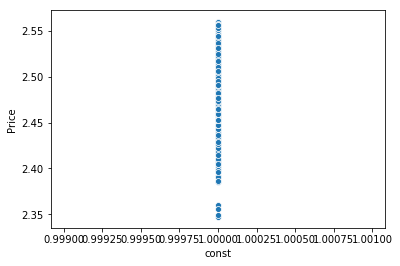

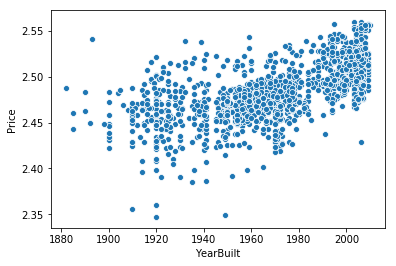

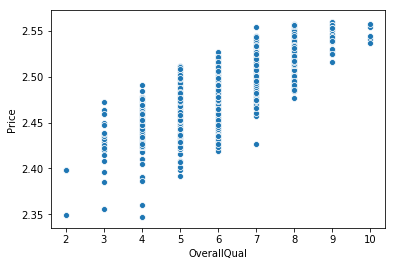

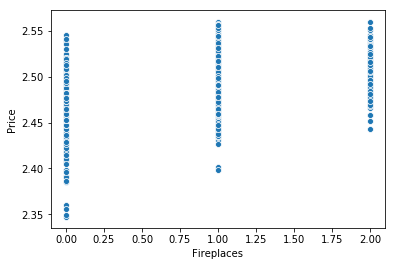

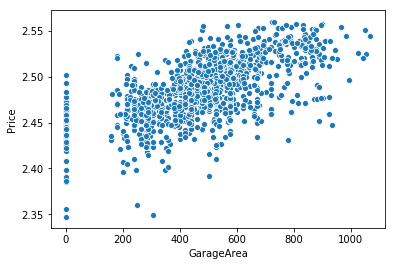

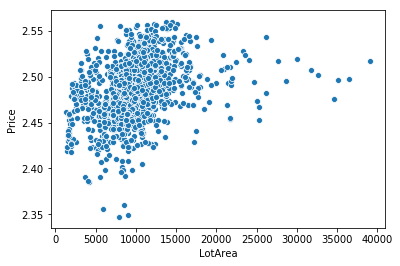

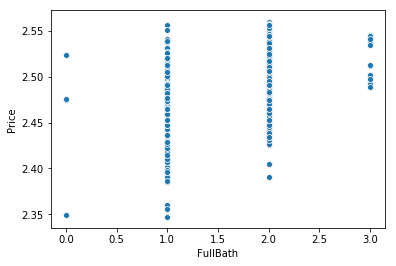

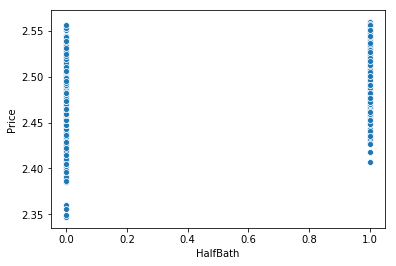

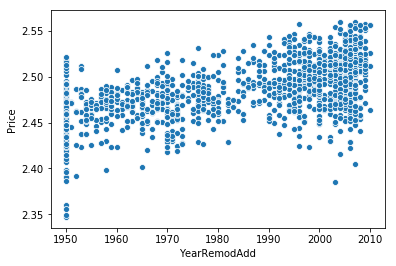

In [167]:
features = X.columns
target = y_log
for feature in features:
  sns.scatterplot(X[feature], target)
  plt.show()

## 2.6 Use seaborn's residplot to plot the distribution of each x variable's residuals. Does these plots indicate any other features that would be potential candidates for polynomial features.

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in true_divide
  res = _lowess(y, x, frac=frac, it=it, delta=delta)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3405: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/smoothers_lowess.py:165: RuntimeWarning: invalid value encountered in greater_equal
  res = _lowess(y, x, frac=frac, it=it, delta=delta)


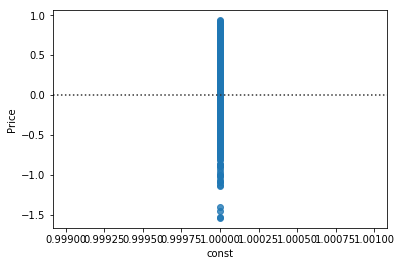

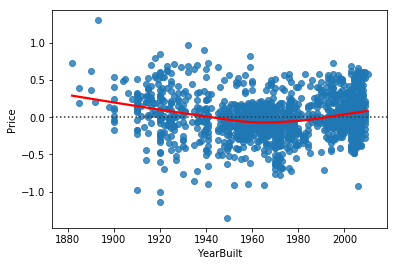

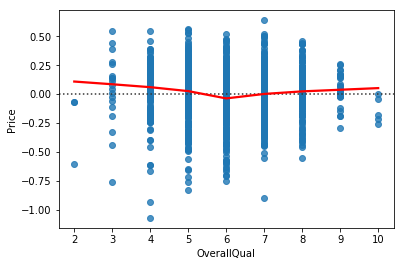

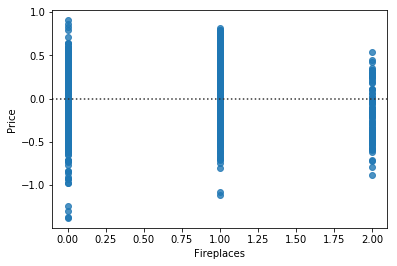

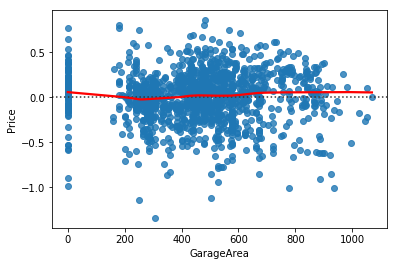

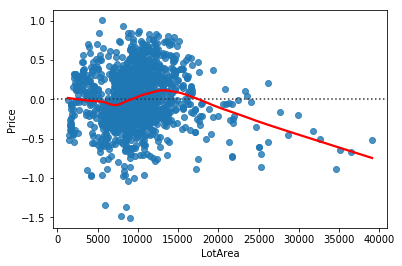

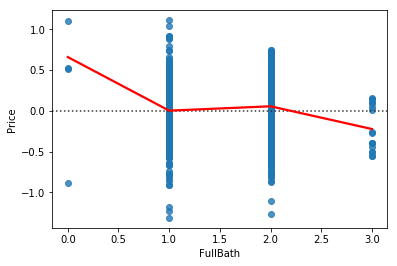

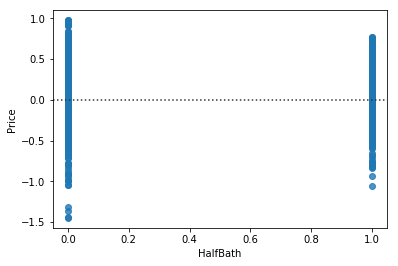

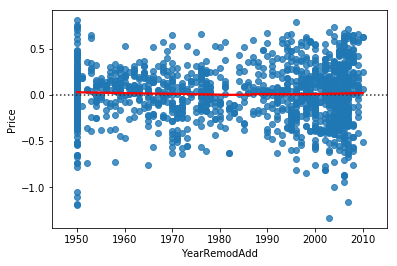

In [168]:
for feature in features:
    sns.residplot(X[feature], y, lowess=True, line_kws=dict(color='r'))
    plt.show()

## 2.6 Feature Engineer the appropriate polynomial features from your analysis above and include them in one final log-polynomial, robust standard error, regression. Do the coefficients of this most advanced regression match your intuition better than the coefficients of the very first regression that we ran with the Statmodels library?

In [174]:
X['YearBuilt**2'] = X['YearBuilt']**2
model = sm.OLS(y_log, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     499.7
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:31:47   Log-Likelihood:                 3993.6
No. Observations:                1387   AIC:                            -7967.
Df Residuals:                    1377   BIC:                            -7915.
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -4.1178      2.340     -1.760   

In [175]:
X['LotArea**2'] = X['LotArea']**2
X['LotArea**3'] = X['LotArea']**3
model = sm.OLS(y_log, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                 1.259e+06
Date:                Wed, 01 May 2019   Prob (F-statistic):               0.00
Time:                        22:34:11   Log-Likelihood:                 4017.3
No. Observations:                1387   AIC:                            -8013.
Df Residuals:                    1376   BIC:                            -7955.
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.771e-06   1.35e-07     20.584   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1532: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 11, but rank is 9
  'rank is %d' % (J, J_), ValueWarning)


# Stretch Goals

- Research the assumptions that are required for OLS to be BLUE the "Best Linear Unbiased Estimator". You might try searching and trying to understand the conditions of what's called the Gauss-Markov Theorem.
- Research other diagnostic tests. Can you show that residuals are normally distributed graphically?
- Write a blog post about inferential modeling using linear regression.